# TF_IDF

In [54]:
%config IPCompleter.greedy=True

## 1. Import packages

In [55]:
import numpy as np  
import pandas as pd 
## nltk
from nltk.tokenize import RegexpTokenizer 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
import re
## sklearn
from sklearn.metrics import average_precision_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cross_validation import cross_val_score
## classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process import GaussianProcessClassifier
## matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Data

In [94]:
train = pd.read_csv('./emails.train.csv')
text = train['text']
# ham_count = train[train['spam']==0]
# spam_count = train[train['spam']==1]

## 3. Define Methods for Text Processing 

In [57]:
re_tokenizer = RegexpTokenizer(r'\b[^\d\W]+\b') # tokenize words that are not numbers
mystopwords = set(stopwords.words('english')) # stop words remover
extras = set(['_', 'subject']) # remove subject and _
mystopwords.update(extras)
ps = PorterStemmer() # stemming words
stemmer = SnowballStemmer("english") # stemming words
lemmatizer = WordNetLemmatizer() # lemmatizing words

## 4. Perform Text Processing

In [58]:
## First, lemmatize and create list of words
def stemm(df):
    for i, line in enumerate(df['text']): 
        newline = [] 
        words = line.split() 
        for word in words: 
            word = stemmer.stem(word) 
            newline.append(word)
        new = ' '.join(newline)  
        df.loc[i, 'text'] = new # replace line at the index position with the new line that is the lemmatized words



In [59]:
## dirty data
train = pd.read_csv('./emails.train.csv')
test  = pd.read_csv('./emails.test.csv')

## clean data
stemm(train)
stemm(test)


### We tried train_test_split but decided to go for cross-validation instead
#subtrain_X, subval_X = train_test_split(train, test_size = 0.25)

Y_train = train['spam'] ## labels
Y_test = test['spam'] ## labels

## 5. TF_IDF Feature Extraction

In [60]:
vectorizer = TfidfVectorizer(stop_words=mystopwords, tokenizer=re_tokenizer.tokenize, max_features = 2000)
v = vectorizer.fit(train['text'])

X_train = v.transform(train['text']).todense() ## features
X_test = v.transform(test['text']).todense() ## features


## 6. Model Evaluation

### Create Empty Arrays to Use for Plotting Evaluation Results

In [61]:
method_name = []
accuracy_value = []

### Model 1: KNN Classifier

#### Cross-validation to select hyperparameter

In [62]:
k_range = list(range(1, 11))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.94454142780894501, 0.89754677045765641, 0.91096232912527508, 0.89180432589501402, 0.97214911500922518, 0.96120380443407727, 0.97363484397902467, 0.96741838907909039, 0.97089789907414858, 0.9684121886683611]


#### Plot results accuracy scores

Text(0,0.5,'Cross-Validated Accuracy')

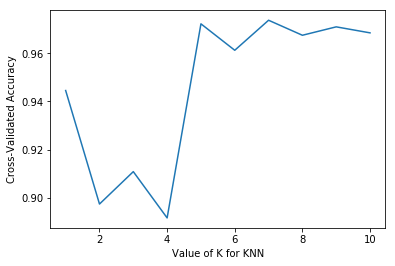

In [63]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

#### With higest accuracy parameter, perform cross-validation for model selection

In [64]:
knn = KNeighborsClassifier(n_neighbors=7) 
scores = cross_val_score(knn, X_train, Y_train, cv=10, scoring='accuracy').mean()
print(scores)

0.973634843979


#### Store method name and average accuracy on variables

In [65]:
method_name.append('KNN')
accuracy_value.append(scores)
print(method_name)
print(accuracy_value)

['KNN']
[0.97363484397902467]


### Model 2: Decision Tree

#### Perform cross-validation for model selection

In [66]:
dtree = tree.DecisionTreeClassifier()
scores = cross_val_score(dtree, X_train, Y_train, cv = 10, scoring = 'accuracy').mean()
print(scores)

0.955483636686


#### Store method name and average accuracy on variables

In [67]:
method_name.append('DecisionTree')
accuracy_value.append(scores)
print(method_name)
print(accuracy_value)

['KNN', 'DecisionTree']
[0.97363484397902467, 0.95548363668560299]


### Model 3: Random Forest Classifier

#### Cross-validation to select hyperparameter

In [68]:
rforest = RandomForestClassifier()
k_range = range(11, 51)
k_scores = []
for k in k_range:
    rforest = RandomForestClassifier(n_estimators= k)
    scores = cross_val_score(rforest, X_train, Y_train, cv = 10, scoring = 'accuracy')
    k_scores.append(scores.mean())
print(k_scores)


[0.97388918941242986, 0.97015781534275869, 0.97588047676446088, 0.97264787428364996, 0.97438545809223598, 0.97737176416267091, 0.97463359705005226, 0.97339476020145566, 0.9773655853945622, 0.97438545809223598, 0.97414102577956319, 0.9761242702657823, 0.97861495262498044, 0.97960934484646867, 0.98060437895791741, 0.97662427021960307, 0.98060313827852141, 0.97861494338915378, 0.98085066921107544, 0.98060500545483331, 0.97712364059789913, 0.97587985334615401, 0.97786496193007599, 0.97786929815074441, 0.97886060714539591, 0.97961059476169154, 0.97910936336430132, 0.98010748070258669, 0.9808586966838424, 0.98060561963731341, 0.98135126795433192, 0.98259196274341376, 0.98084818477367453, 0.97786929507213538, 0.97936121820308808, 0.98110127413463921, 0.97935998368090993, 0.97886555754854443, 0.97886432302636606, 0.97911245890557352]


#### Plot results accuracy scores

Text(0,0.5,'Cross-Validated Accuracy')

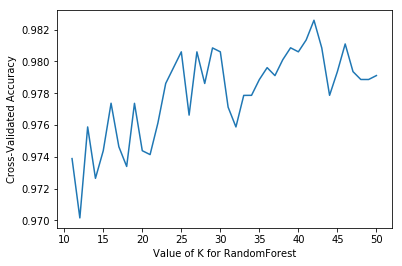

In [69]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for RandomForest')
plt.ylabel('Cross-Validated Accuracy')

#### With higest accuracy parameter, perform cross-validation for model selection

In [70]:
rforest = RandomForestClassifier(n_estimators=50)
scores = cross_val_score(rforest, X_train, Y_train, cv = 10, scoring = 'accuracy').mean()
print(scores)

0.982098783448


#### Store method name and average accuracy on variables

In [71]:
method_name.append('RandomForest')
accuracy_value.append(scores)
print(method_name)
print(accuracy_value)

['KNN', 'DecisionTree', 'RandomForest']
[0.97363484397902467, 0.95548363668560299, 0.98209878344766222]


### Model 4: SVM 

#### Perform cross-validation for model selection

In [72]:
svm = SVC()
scores = cross_val_score(svm, X_train, Y_train, cv = 10, scoring = 'accuracy').mean()
print(scores)

0.762995230034


#### Store method name and average accuracy on variables

In [73]:
method_name.append('SVM')
accuracy_value.append(scores)
print(method_name)
print(accuracy_value)

['KNN', 'DecisionTree', 'RandomForest', 'SVM']
[0.97363484397902467, 0.95548363668560299, 0.98209878344766222, 0.76299523003412051]


### Model 5: Multinomial Naive Bayes

#### Perform cross-validation for model selection

In [74]:
nb = MultinomialNB()
scores = cross_val_score(nb, X_train, Y_train, cv = 10, scoring = 'accuracy').mean()
print(scores)

0.984082651352


#### Store method name and average accuracy on variables

In [75]:
method_name.append('NaiveBayes')
accuracy_value.append(scores)
print(method_name)
print(accuracy_value)

['KNN', 'DecisionTree', 'RandomForest', 'SVM', 'NaiveBayes']
[0.97363484397902467, 0.95548363668560299, 0.98209878344766222, 0.76299523003412051, 0.98408265135218809]


### Model 6: Logistic Regression

#### Perform cross-validation for model selection

In [76]:
logreg = LogisticRegression()
scores = cross_val_score(logreg, X_train, Y_train, cv=10, scoring='accuracy').mean()
print(scores)

0.982341351663


#### Store method name and average accuracy on variables

In [77]:
method_name.append('LogisticRegression')
accuracy_value.append(scores)
print(method_name)
print(accuracy_value)

['KNN', 'DecisionTree', 'RandomForest', 'SVM', 'NaiveBayes', 'LogisticRegression']
[0.97363484397902467, 0.95548363668560299, 0.98209878344766222, 0.76299523003412051, 0.98408265135218809, 0.98234135166263203]


### Model 7: Gaussian Process Classifier 

#### Perform cross-validation for model selection

In [78]:
gp = GaussianProcessClassifier()
scores = cross_val_score(gp, X_train, Y_train, cv=10, scoring='accuracy').mean()
print(scores)

0.969412790444


#### Store method name and average accuracy on variables

In [79]:
method_name.append('GaussianProcess')
accuracy_value.append(scores)
print(method_name)
print(accuracy_value)

['KNN', 'DecisionTree', 'RandomForest', 'SVM', 'NaiveBayes', 'LogisticRegression', 'GaussianProcess']
[0.97363484397902467, 0.95548363668560299, 0.98209878344766222, 0.76299523003412051, 0.98408265135218809, 0.98234135166263203, 0.96941279044404727]


### Plot evaluation results

Text(0,0.5,'Cross-Validated Accuracy')

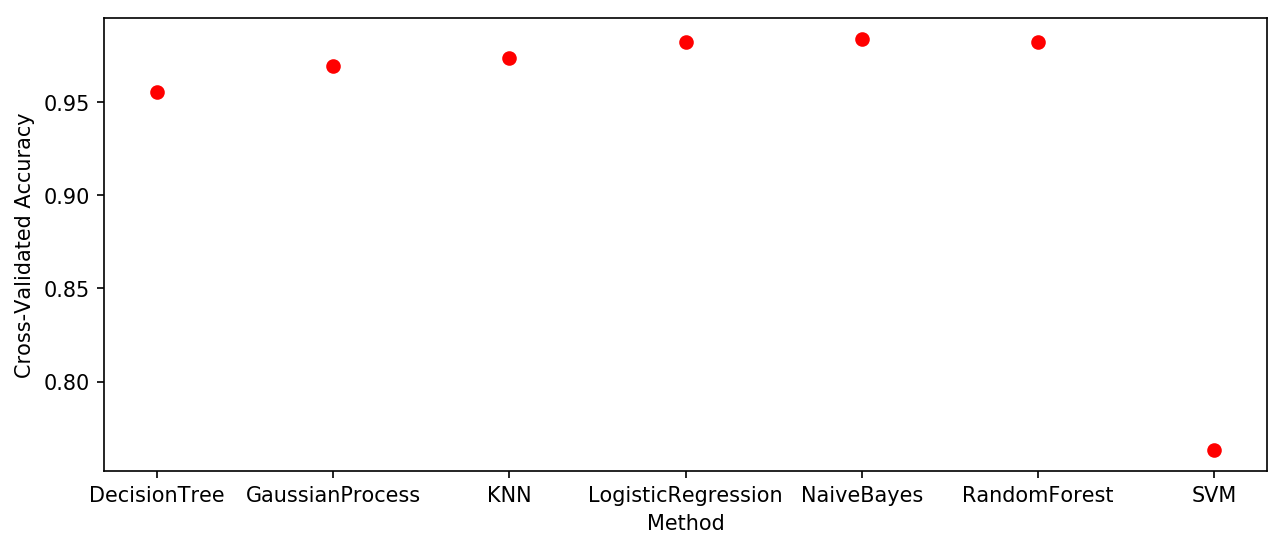

In [80]:
fig = plt.figure(figsize=(10, 4), dpi=150)

plt.plot(method_name, accuracy_value, 'ro')
plt.xlabel('Method')
plt.ylabel('Cross-Validated Accuracy')

## 7. Predictions

In [111]:
print(len(X_test))
print(len(Y_test))
knnn = KNeighborsClassifier(n_neighbors=7)

knnn.fit(X_train, Y_train)

Y_pred = nb.predict(X_test)

print(accuracy_score(Y_test, Y_pred))



1707
1707
0.97539543058


#### Write to csv solution

In [112]:
pd.DataFrame({
    'id': test.id,
    'spam': Y_pred
}).to_csv('predictions.knn.csv', index=False)